In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('.ESC-50-master'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [3]:
paths = []
labels = []
for dirname, _, filenames in os.walk('ESC-50-master/audio/'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('-')[-1]
        label = label.split('.')[0]
        labels.append(label)
print('Dataset is Loaded')

Dataset is Loaded


In [4]:
len(paths)

2000

In [5]:
labels1=[]

for i in labels:
    if (i == '0' or i == '1' or i == '2' or i == '3' or i == '4' or i == '5' or i == '6' or i == '7' or i == '8' or i == '9'):
        labels1.append("Animals")
    elif (i == '10' or i == '11' or i == '12' or i == '13' or i == '14' or i == '15' or i == '16' or i == '17' or i == '18' or i == '19'):
        labels1.append("NaturalSoundScapes")
    elif (i == '20' or i == '21' or i == '22' or i == '23' or i == '24' or i == '25' or i == '26' or i == '27' or i == '28' or i == '29'):
        labels1.append("HumanSounds")
    elif (i == '30' or i == '31' or i == '32' or i== '33' or i == '34' or i == '35' or i == '36' or i == '37' or i == '38' or i == '39'):
        labels1.append("InteriorSounds")
    else:
        labels1.append("ExteriorSounds")
print(len(labels))
print(labels1[0:8])

2000
['NaturalSoundScapes', 'ExteriorSounds', 'HumanSounds', 'Animals', 'HumanSounds', 'InteriorSounds', 'NaturalSoundScapes', 'ExteriorSounds']


In [6]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels1
df.head()

,speech,label
0,ESC-50-master/audio/4-170247-B-12.wav,NaturalSoundScapes
1,ESC-50-master/audio/3-128512-A-47.wav,ExteriorSounds
2,ESC-50-master/audio/1-61534-A-27.wav,HumanSounds
3,ESC-50-master/audio/4-183992-A-0.wav,Animals
4,ESC-50-master/audio/2-110417-B-28.wav,HumanSounds


In [7]:
df['label'].value_counts()

NaturalSoundScapes    400
ExteriorSounds        400
HumanSounds           400
Animals               400
InteriorSounds        400
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

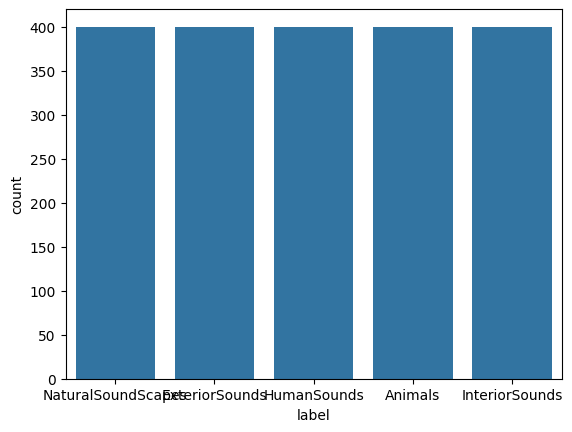

In [8]:
sns.countplot(x=df["label"]) 

In [9]:
def waveshow(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

In [10]:
#path = np.array(df['speech'][df['label']==emotion])[0]
#librosa.load(path)

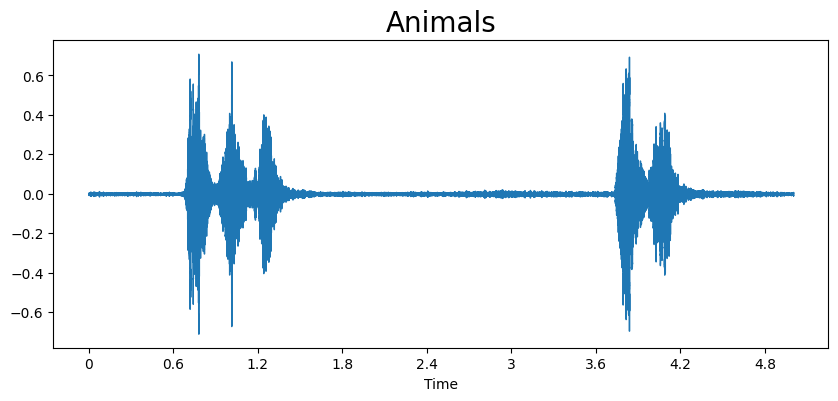

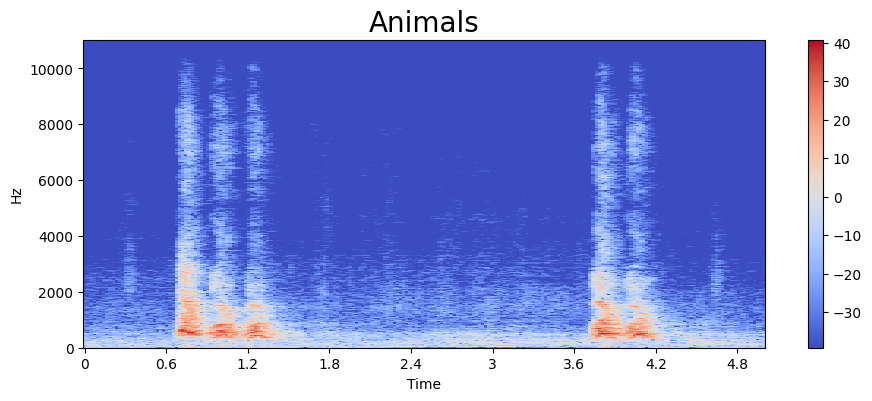

In [11]:
emotion = 'Animals'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

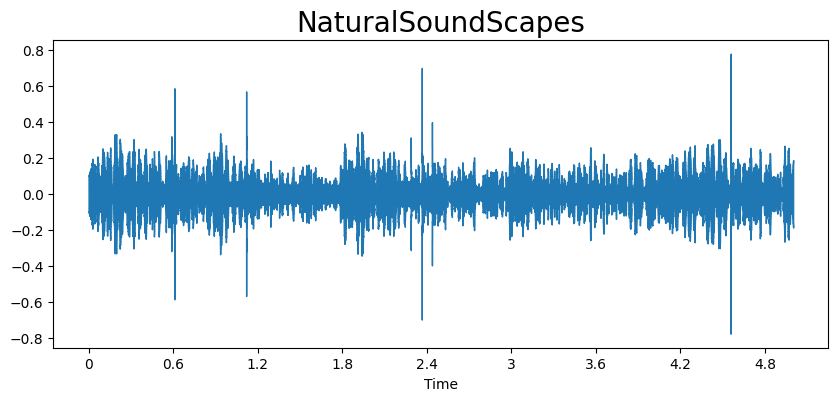

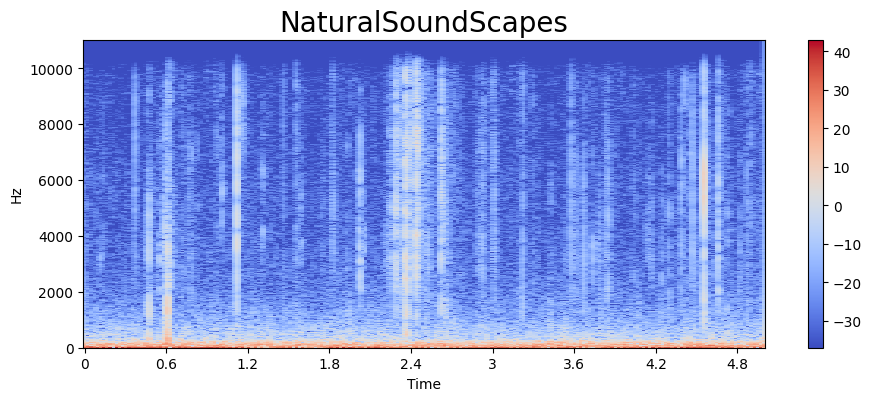

In [12]:
emotion = 'NaturalSoundScapes'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
#Audio(path)

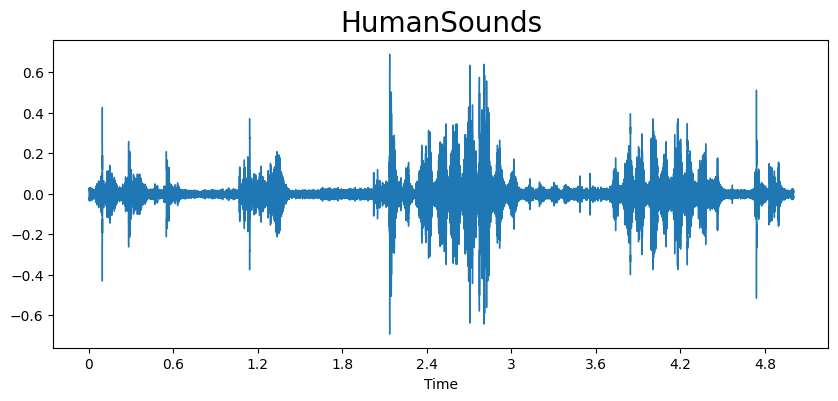

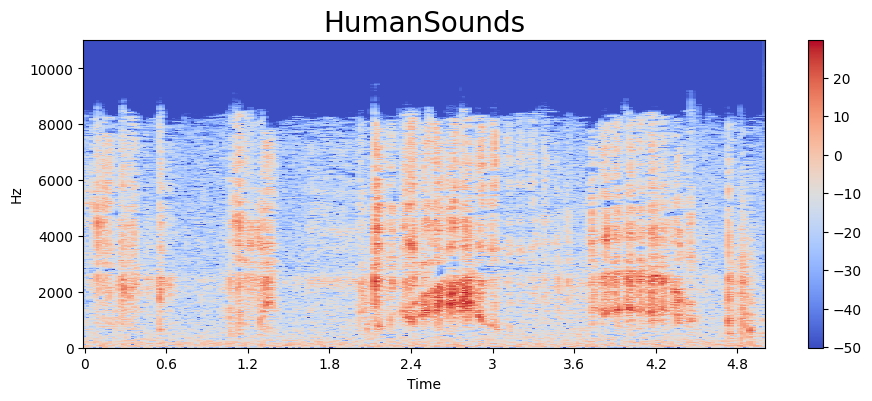

In [13]:
emotion = 'HumanSounds'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

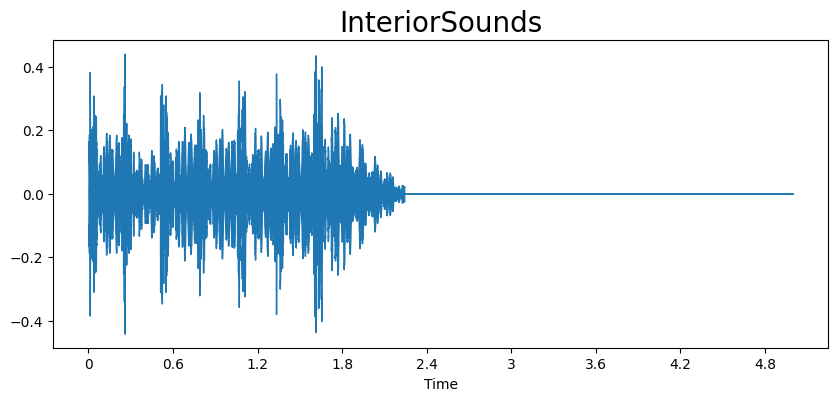

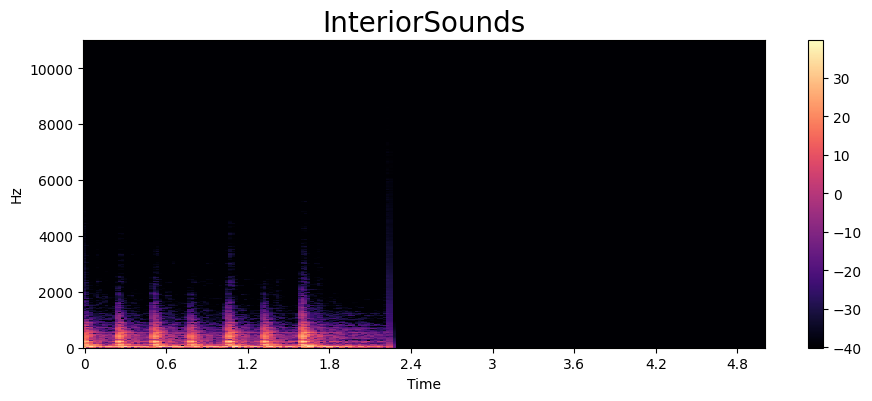

In [14]:
emotion = 'InteriorSounds'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

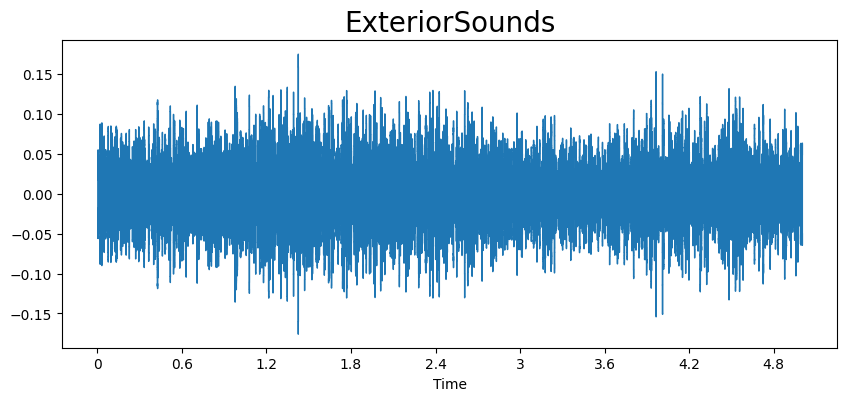

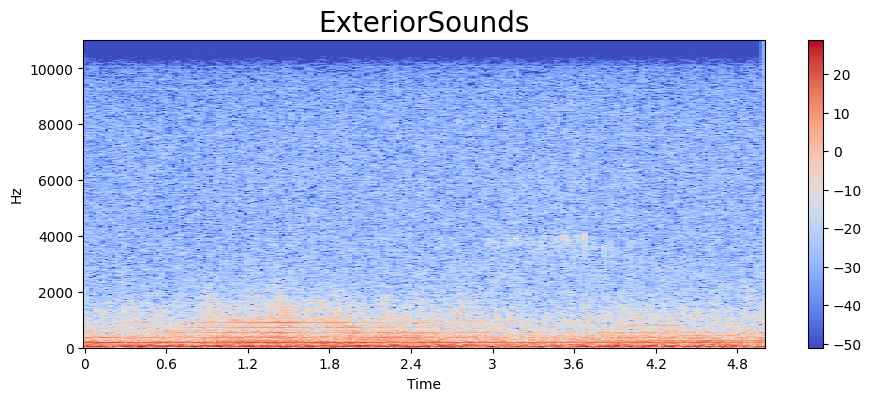

In [15]:
emotion = 'ExteriorSounds'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [16]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=4, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    return mfcc

In [17]:
import numpy as np
import librosa

def extract_features(filename):
    # 加载音频文件
    y, sr = librosa.load(filename, duration=4, offset=0.5)

    # 提取 MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)

    # 提取过零率
    zcr = np.mean(librosa.feature.zero_crossing_rate(y)[0])

    # 将 MFCC 和 ZCR 结合成一个特征向量
    features = np.append(mfcc, zcr)
    return features

In [18]:
filename = df['speech'][0]
print(extract_features(filename))

[-2.97057709e+02  1.11424622e+02  3.75589180e+01  4.20668640e+01
  1.37812300e+01  2.48719940e+01  1.13785973e+01  1.69689102e+01
  4.71893501e+00  1.51781397e+01  5.88772869e+00  1.08444271e+01
  3.18243790e+00  7.41255379e+00 -4.51779306e-01  6.78773165e+00
 -2.47682631e-01  5.76272440e+00 -1.28644133e+00  3.58721042e+00
 -2.20028782e+00  3.71632195e+00 -2.59292245e+00  2.97715092e+00
 -2.24715281e+00  3.96575785e+00 -9.22224164e-01  3.74859476e+00
  5.74338734e-01  3.49799180e+00 -3.14549297e-01  3.90346074e+00
  7.30960220e-02  2.14187288e+00  1.19553757e+00  2.21766877e+00
  4.08452988e-01  2.05805635e+00  3.03451461e-03  1.31516814e+00
  9.90674675e-03]


In [19]:
X_features = df['speech'].apply(lambda x: extract_features(x))

In [20]:
X_features 

0       [-297.0577087402344, 111.42462158203125, 37.55...
1       [-296.9081115722656, 145.80035400390625, 34.92...
2       [-223.7125701904297, 75.20081329345703, -80.71...
3       [-375.05377197265625, 148.31015014648438, 13.7...
4       [-581.8898315429688, 80.92137908935547, 42.878...
                              ...                        
1995    [-24.184316635131836, 68.80377197265625, -49.6...
1996    [-122.60185241699219, 197.26666259765625, -35....
1997    [-134.37094116210938, 190.46630859375, -43.554...
1998    [-522.6489868164062, 197.3568878173828, -47.80...
1999    [-219.06529235839844, 84.25749969482422, -13.3...
Name: speech, Length: 2000, dtype: object

In [21]:
from sklearn.decomposition import PCA
import pandas as pd

# 转换为 NumPy 数组
features_array = np.array(X_features.tolist())

# 应用 PCA 降维到20维
pca = PCA(n_components=20)
reduced_features = pca.fit_transform(features_array)

In [22]:
reduced_features

array([[  -6.76486842,   44.2060422 ,  -63.30399118, ...,    3.12564637,
          -1.04820152,   -0.52147737],
       [ -11.72316357,   73.10663884,  -43.60952162, ...,    4.05952357,
           0.27466134,    4.23512227],
       [ -83.77378491,  -22.87267911,   34.72198622, ...,   20.00455601,
          -0.52804674,   -6.18452427],
       ...,
       [-181.14046472,   88.22329757,   37.14646534, ...,   -5.82551102,
           7.87161555,    2.43126882],
       [ 203.08621148,  130.51391788,   80.11663438, ...,   -1.10982008,
          -4.09425507,    7.51362571],
       [ -84.63601229,   -3.01232608,  -11.56894792, ...,    8.42455829,
          -2.89666417,   -2.4641138 ]])

In [23]:
X_features

0       [-297.0577087402344, 111.42462158203125, 37.55...
1       [-296.9081115722656, 145.80035400390625, 34.92...
2       [-223.7125701904297, 75.20081329345703, -80.71...
3       [-375.05377197265625, 148.31015014648438, 13.7...
4       [-581.8898315429688, 80.92137908935547, 42.878...
                              ...                        
1995    [-24.184316635131836, 68.80377197265625, -49.6...
1996    [-122.60185241699219, 197.26666259765625, -35....
1997    [-134.37094116210938, 190.46630859375, -43.554...
1998    [-522.6489868164062, 197.3568878173828, -47.80...
1999    [-219.06529235839844, 84.25749969482422, -13.3...
Name: speech, Length: 2000, dtype: object

In [24]:
X = [x for x in X_features]
X = np.array(X)
X.shape

(2000, 41)

In [25]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2000, 41, 1)

In [26]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [27]:
y = y.toarray()

In [28]:
print(y.shape)
print(y)

(2000, 5)
[[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]


In [29]:
# pip install keras

In [30]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(41,1)),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


2024-01-11 08:55:37.094153: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-11 08:55:37.147149: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-11 08:55:37.147178: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-11 08:55:37.148429: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-11 08:55:37.154938: I tensorflow/core/platform/cpu_feature_guar

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 5)                 1

In [31]:
# Train the model
import time

start_time = time.time()
history = model.fit(X, y, validation_split=0.2, epochs=60, batch_size=32)
end_time = time.time()
total_time1 = end_time - start_time
print(f"Training took {total_time1:.2f} seconds.")

Epoch 1/60


2024-01-11 08:55:42.747572: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8905
2024-01-11 08:55:43.802311: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fd8d804af70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-11 08:55:43.802334: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A30 MIG 1g.6gb, Compute Capability 8.0
2024-01-11 08:55:43.806801: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1704963343.959143  193007 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


50/50 [==============================] - 6s 26ms/step - loss: 1.5951 - accuracy: 0.2675 - val_loss: 1.5678 - val_accuracy: 0.2950
Epoch 2/60
50/50 [==============================] - 0s 7ms/step - loss: 1.5640 - accuracy: 0.2975 - val_loss: 1.5274 - val_accuracy: 0.3400
Epoch 3/60
50/50 [==============================] - 0s 8ms/step - loss: 1.5215 - accuracy: 0.3081 - val_loss: 1.5219 - val_accuracy: 0.3325
Epoch 4/60
50/50 [==============================] - 0s 9ms/step - loss: 1.4940 - accuracy: 0.3413 - val_loss: 1.4678 - val_accuracy: 0.3575
Epoch 5/60
50/50 [==============================] - 0s 6ms/step - loss: 1.4537 - accuracy: 0.3719 - val_loss: 1.4642 - val_accuracy: 0.3625
Epoch 6/60
50/50 [==============================] - 0s 7ms/step - loss: 1.4361 - accuracy: 0.3744 - val_loss: 1.4595 - val_accuracy: 0.3925
Epoch 7/60
50/50 [==============================] - 0s 10ms/step - loss: 1.4270 - accuracy: 0.3875 - val_loss: 1.4205 - val_accuracy: 0.4050
Epoch 8/60
50/50 [===========

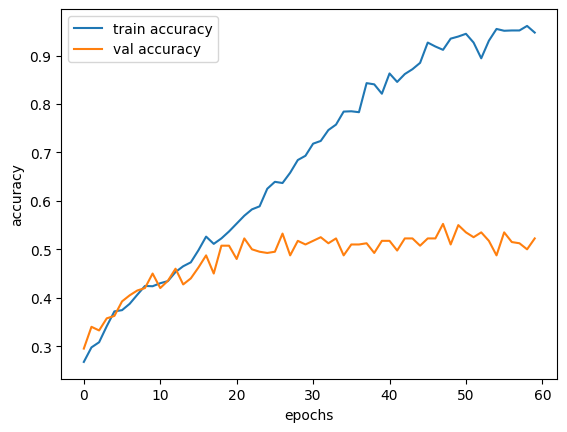

In [32]:
epochs = list(range(60))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [33]:
model2 = Sequential([
    LSTM(256, return_sequences=False, input_shape=(20,1)),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(5, activation='softmax')
])

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                16448     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 5)                

In [34]:
X2 = [x for x in reduced_features]

## input split
X2 = np.expand_dims(X2, -1)
X2.shape

(2000, 20, 1)

In [35]:

# Train the model
import time
start_time = time.time()
history2 = model2.fit(X2, y, validation_split=0.2, epochs=60, batch_size=32)
end_time = time.time()
total_time2 = end_time - start_time
print(f"Training took {total_time2:.2f} seconds.")


Epoch 1/60
50/50 [==============================] - 4s 17ms/step - loss: 1.6054 - accuracy: 0.2212 - val_loss: 1.5971 - val_accuracy: 0.2525
Epoch 2/60
50/50 [==============================] - 0s 5ms/step - loss: 1.5686 - accuracy: 0.2744 - val_loss: 1.6530 - val_accuracy: 0.1975
Epoch 3/60
50/50 [==============================] - 0s 7ms/step - loss: 1.5135 - accuracy: 0.3250 - val_loss: 1.5048 - val_accuracy: 0.3250
Epoch 4/60
50/50 [==============================] - 0s 8ms/step - loss: 1.4575 - accuracy: 0.3669 - val_loss: 1.4786 - val_accuracy: 0.3650
Epoch 5/60
50/50 [==============================] - 0s 6ms/step - loss: 1.4093 - accuracy: 0.3969 - val_loss: 1.4456 - val_accuracy: 0.3600
Epoch 6/60
50/50 [==============================] - 0s 4ms/step - loss: 1.4006 - accuracy: 0.3775 - val_loss: 1.4027 - val_accuracy: 0.4025
Epoch 7/60
50/50 [==============================] - 0s 6ms/step - loss: 1.3466 - accuracy: 0.4344 - val_loss: 1.3838 - val_accuracy: 0.4175
Epoch 8/60
50/50 [=

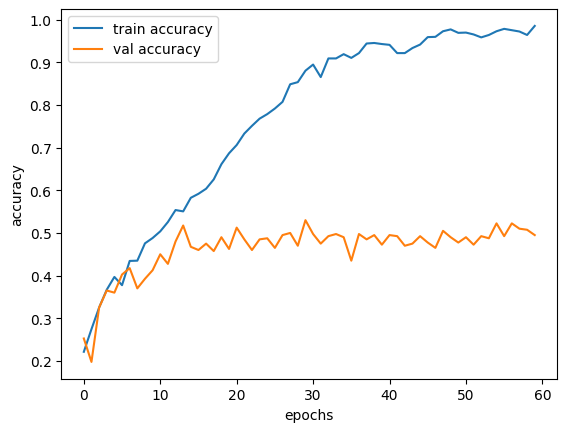

In [36]:
epochs = list(range(60))
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

plt.plot(epochs, acc2, label='train accuracy')
plt.plot(epochs, val_acc2, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()



In [37]:
from sklearn.decomposition import PCA
import pandas as pd

pca2 = PCA(n_components=12)
reduced_features2 = pca2.fit_transform(features_array)

X3 = [x for x in reduced_features2]
X3 = np.array(X3)
print(X3.shape)

(2000, 12)


In [38]:
X3 = np.expand_dims(X3, -1)
print(X3.shape)

(2000, 12, 1)


In [39]:
model3 = Sequential([
    LSTM(256, return_sequences=False, input_shape=(12,1)),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(5, activation='softmax')
])

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [40]:
reduced_features2

array([[-6.76486842e+00,  4.42060422e+01, -6.33039912e+01, ...,
        -1.50738581e+00, -1.98857617e+00,  2.39146574e+00],
       [-1.17231636e+01,  7.31066388e+01, -4.36095214e+01, ...,
        -4.04199429e+00,  6.47506996e+00, -1.02733161e+00],
       [-8.37737849e+01, -2.28726791e+01,  3.47219869e+01, ...,
         1.20796811e+01,  4.35408035e+00,  1.38291273e+01],
       ...,
       [-1.81140465e+02,  8.82232976e+01,  3.71464652e+01, ...,
        -4.58695365e+00,  1.32494267e-01, -6.36836924e-01],
       [ 2.03086211e+02,  1.30513918e+02,  8.01166338e+01, ...,
        -8.42719986e+00, -1.34302490e+01,  1.97307504e+01],
       [-8.46360123e+01, -3.01232608e+00, -1.15689479e+01, ...,
        -9.51187782e+00,  1.10290706e+01,  3.01072772e+00]])

Epoch 1/60
50/50 [==============================] - 4s 18ms/step - loss: 1.6097 - accuracy: 0.2156 - val_loss: 1.6026 - val_accuracy: 0.2375
Epoch 2/60
50/50 [==============================] - 0s 6ms/step - loss: 1.5631 - accuracy: 0.2800 - val_loss: 1.5418 - val_accuracy: 0.3100
Epoch 3/60
50/50 [==============================] - 0s 6ms/step - loss: 1.5086 - accuracy: 0.3131 - val_loss: 1.4854 - val_accuracy: 0.3525
Epoch 4/60
50/50 [==============================] - 0s 7ms/step - loss: 1.4779 - accuracy: 0.3500 - val_loss: 1.4958 - val_accuracy: 0.3350
Epoch 5/60
50/50 [==============================] - 0s 5ms/step - loss: 1.4188 - accuracy: 0.3944 - val_loss: 1.4613 - val_accuracy: 0.3275
Epoch 6/60
50/50 [==============================] - 0s 6ms/step - loss: 1.3756 - accuracy: 0.4200 - val_loss: 1.4049 - val_accuracy: 0.3950
Epoch 7/60
50/50 [==============================] - 0s 6ms/step - loss: 1.3113 - accuracy: 0.4500 - val_loss: 1.3693 - val_accuracy: 0.4350
Epoch 8/60
50/50 [=

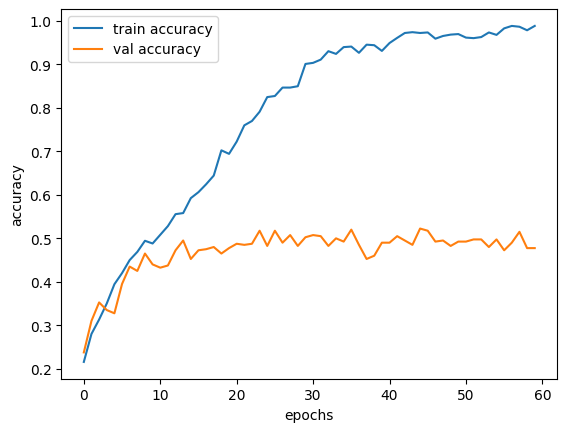

In [41]:
# Train the model

import time

start_time = time.time()
history3 = model3.fit(X3, y, validation_split=0.2, epochs=60, batch_size=32)
end_time = time.time()
total_time3 = end_time - start_time
print(f"Training took {total_time3:.2f} seconds.")

epochs = list(range(60))
acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']

plt.plot(epochs, acc3, label='train accuracy')
plt.plot(epochs, val_acc3, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

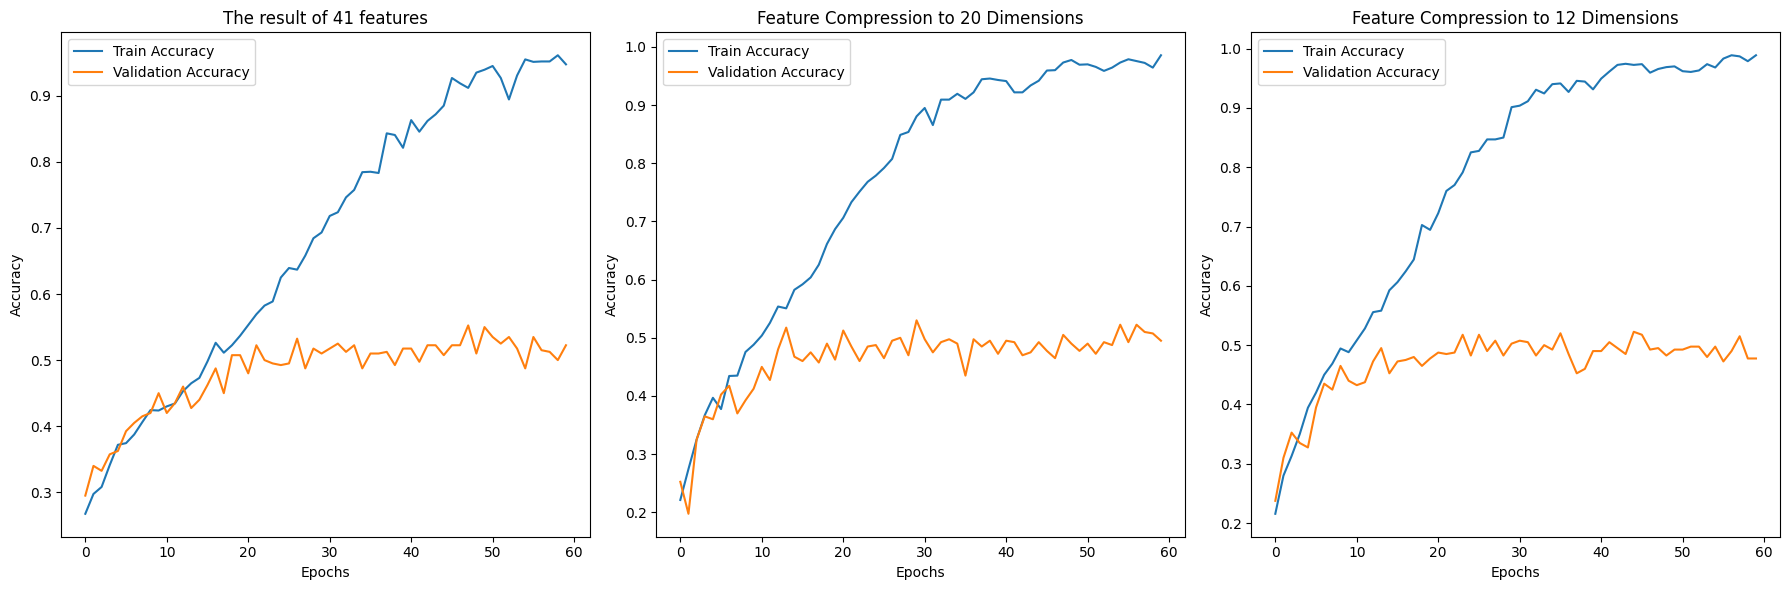

In [44]:
import matplotlib.pyplot as plt

# 创建第一张图
plt.figure(figsize=(18, 6))  # 设置图的大小

# 绘制训练精度和验证精度曲线
plt.subplot(1, 3, 1)  # 创建第一个子图
epochs = list(range(60))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('The result of 41 features')
plt.legend()

plt.subplot(1, 3, 2)  # 创建第一个子图
epochs = list(range(60))
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
plt.plot(epochs, acc2, label='Train Accuracy')
plt.plot(epochs, val_acc2, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Feature Compression to 20 Dimensions')
plt.legend()

# 创建第二张图
plt.subplot(1, 3, 3)  # 创建第二个子图
epochs = list(range(60))
acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']
plt.plot(epochs, acc3, label='Train Accuracy')
plt.plot(epochs, val_acc3, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Feature Compression to 12 Dimensions')
plt.legend()

# 保存图或显示图
plt.tight_layout()  # 确保子图不重叠
#plt.savefig('combined_accuracy_plot.png')  # 保存图像为文件
plt.show()
